# Loan Approval/Eligibility Problem

## 1. Problem Definition
In a statement,
> we will build an automated machine learning model to predict the repaying capacity of applicants.


## 2. Evaluation
> To achieve a passing grade, the accuracy of the model has to be at least 70%

## 3. Features
Here, we get to see different information about each of the features in the data.

**Create data dictionary**

1. Loan ID: A unique identifier for the loan information.
2. Customer ID: A unique identifier for the loan customer.
3. Loan Status: A categorical variable indicating if the loan was given to the customer.
4. Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted. This data is for previous loan.
5. Term: A categorical variable indicating if it is a short term or long term loan.
6. Credit Score: A value between 0 and 800 indicating the riskiness of the borrower's credit history.
7. Years in current job: A categorical variable indicating how many years the customer has been in current job.
8. Home Ownership: Categorical variable indicating howme ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage.
9. Annual Income: The customer's annual invome.
10. Purpose: A description of the purpose of the loan.
11. Monthly Debt: The customer's monthly payment for their existing loans
12. Years of Credit History: The years since the first entry in the customer's credit history.
13. Months since last delinquent: Months since the last loan deliquent payment.
14. Number of open accounts: The total number of open credit cards
15. Number of Credit Problems: The number of credit problems in the customer records.
16. Current Credit Balance: The current total debt for the customer.
17. Maximum Open Credit: The maximum credit limit for all credit sources.
18. Bankruptcies: The number of bankrupt
19. Tax Liens: The number of tax liens.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import statistics

In [2]:
# pip install fancyimpute

In [3]:
df = pd.read_csv("LoansTrainingSetV2.csv", low_memory=False)
df.head()

Loan ID                           Customer ID  \
0  6cf51492-02a2-423e-b93d-676f05b9ad53  7c202b37-2add-44e8-9aea-d5b119aea935   
1  552e7ade-4292-4354-9ff9-c48031697d72  e7217b0a-07ac-47dd-b379-577b5a35b7c6   
2  9b5e32b3-8d76-4801-afc8-d729d5a2e6b9  0a62fc41-16c8-40b5-92ff-9e4b763ce714   
3  5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe  30f36c59-5182-4482-8bbb-5b736849ae43   
4  1450910f-9495-4fc9-afaf-9bdf4b9821df  70c26012-bba5-42c0-8dcb-75295ada31bb   

    Loan Status  Current Loan Amount        Term  Credit Score  \
0  Loan Refused                12232  Short Term        7280.0   
1  Loan Refused                25014   Long Term        7330.0   
2  Loan Refused                16117  Short Term        7240.0   
3  Loan Refused                11716  Short Term        7400.0   
4  Loan Refused                 9789   Long Term        6860.0   

  Years in current job Home Ownership  Annual Income             Purpose  \
0             < 1 year           Rent        46643.0  Debt Consolidation   
1            10+ years  Home Mortgage        81099.0  Debt Consolidation   
2              9 years  Home Mortgage        60438.0   Home Improvements   
3              3 years           Rent        34171.0  Debt Consolidation   
4            10+ years  Home Mortgage        47003.0   Home Improvements   

  Monthly Debt  Years of Credit History  Months since last delinquent  \
0       777.39                     18.0                          10.0   
1       892.09                     26.7                           NaN   
2      1244.02                     16.7                          32.0   
3       990.94                     10.0                           NaN   
4       503.71                     16.7                          25.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                       12                          0                    6762   
1                       14                          0                   35706   
2                       11                          1                   11275   
3                       21                          0                    7009   
4                       13                          1                   16913   

  Maximum Open Credit  Bankruptcies  Tax Liens  
0                7946           0.0        0.0  
1               77961           0.0        0.0  
2               14815           1.0        0.0  
3               43533           0.0        0.0  
4               19553           1.0        0.0

In [4]:
df.head().T

0  \
Loan ID                       6cf51492-02a2-423e-b93d-676f05b9ad53   
Customer ID                   7c202b37-2add-44e8-9aea-d5b119aea935   
Loan Status                                           Loan Refused   
Current Loan Amount                                          12232   
Term                                                    Short Term   
Credit Score                                                7280.0   
Years in current job                                      < 1 year   
Home Ownership                                                Rent   
Annual Income                                              46643.0   
Purpose                                         Debt Consolidation   
Monthly Debt                                                777.39   
Years of Credit History                                       18.0   
Months since last delinquent                                  10.0   
Number of Open Accounts                                         12   
Number of Credit Problems                                        0   
Current Credit Balance                                        6762   
Maximum Open Credit                                           7946   
Bankruptcies                                                   0.0   
Tax Liens                                                      0.0   

                                                                 1  \
Loan ID                       552e7ade-4292-4354-9ff9-c48031697d72   
Customer ID                   e7217b0a-07ac-47dd-b379-577b5a35b7c6   
Loan Status                                           Loan Refused   
Current Loan Amount                                          25014   
Term                                                     Long Term   
Credit Score                                                7330.0   
Years in current job                                     10+ years   
Home Ownership                                       Home Mortgage   
Annual Income                                              81099.0   
Purpose                                         Debt Consolidation   
Monthly Debt                                                892.09   
Years of Credit History                                       26.7   
Months since last delinquent                                   NaN   
Number of Open Accounts                                         14   
Number of Credit Problems                                        0   
Current Credit Balance                                       35706   
Maximum Open Credit                                          77961   
Bankruptcies                                                   0.0   
Tax Liens                                                      0.0   

                                                                 2  \
Loan ID                       9b5e32b3-8d76-4801-afc8-d729d5a2e6b9   
Customer ID                   0a62fc41-16c8-40b5-92ff-9e4b763ce714   
Loan Status                                           Loan Refused   
Current Loan Amount                                          16117   
Term                                                    Short Term   
Credit Score                                                7240.0   
Years in current job                                       9 years   
Home Ownership                                       Home Mortgage   
Annual Income                                              60438.0   
Purpose                                          Home Improvements   
Monthly Debt                                               1244.02   
Years of Credit History                                       16.7   
Months since last delinquent                                  32.0   
Number of Open Accounts                                         11   
Number of Credit Problems                                        1   
Current Credit Balance                                       11275   
Maximum Open Credit                                          14815   
Ban

In [5]:
df.shape

(111107, 19)

In [6]:
len(df)

111107

## Exploratory Data Analysis(EDA)

In [7]:
df.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [8]:
# Drop the duplicates with respect to LOAN ID
df.drop_duplicates(subset="Loan ID", keep="first", inplace=True)
df.shape

(88910, 19)

In [9]:
status = df["Loan Status"].value_counts()

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


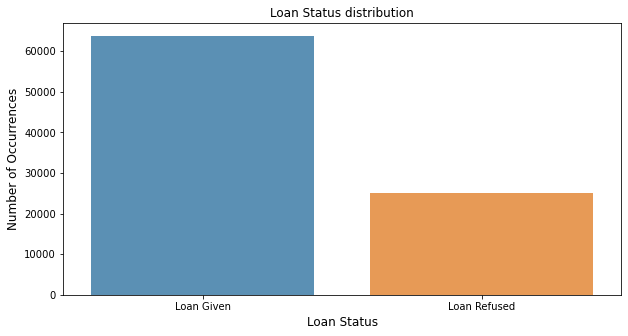

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show()

### Removing Outliers

In [11]:
df.describe().T

count          mean           std     min  \
Current Loan Amount           88910.0  1.433878e+07  3.502996e+07   491.0   
Credit Score                  67572.0  1.199200e+03  1.680814e+03   585.0   
Annual Income                 67572.0  7.234575e+04  5.836101e+04  4033.0   
Years of Credit History       88910.0  1.831531e+01  7.049175e+00     3.6   
Months since last delinquent  40404.0  3.508029e+01  2.200858e+01     0.0   
Number of Open Accounts       88910.0  1.111035e+01  4.978461e+00     0.0   
Number of Credit Problems     88910.0  1.604769e-01  4.737460e-01     0.0   
Current Credit Balance        88910.0  1.543593e+04  1.965873e+04     0.0   
Bankruptcies                  88718.0  1.126716e-01  3.433000e-01     0.0   
Tax Liens                     88902.0  2.822209e-02  2.575327e-01     0.0   

                                  25%      50%       75%         max  
Current Loan Amount            8283.0  14355.0  24485.00  99999999.0  
Credit Score                    714.0    733.0    744.00      7510.0  
Annual Income                 44586.0  61494.0  86750.25   8713547.0  
Years of Credit History          13.5     17.0     21.80        70.5  
Months since last delinquent     16.0     32.0     51.00       176.0  
Number of Open Accounts           8.0     10.0     14.00        76.0  
Number of Credit Problems         0.0      0.0      0.00        15.0  
Current Credit Balance         5949.0  11039.0  19301.00   1730472.0  
Bankruptcies                      0.0      0.0      0.00         7.0  
Tax Liens                         0.0      0.0      0.00        15.0

### Current Loan Amount

In [12]:
df['Current Loan Amount'].describe().T

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

The percentile are quite high. 25%, 50%, 75% is raise to the power of 4 and the max is raised to the power of 8. So we need to remove the outliers.

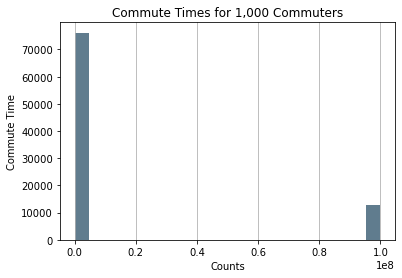

In [13]:
df["Current Loan Amount"].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [14]:
Q1 = df["Current Loan Amount"].quantile(0.25)
Q3 = df["Current Loan Amount"].quantile(0.75)
IQR = Q3 - Q1

In [15]:
df["Current Loan Amount"][((df["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |(df["Current Loan Amount"] > (Q3 + 1.5 * IQR)))]

5044     99999999
5045     99999999
5046     99999999
5047     99999999
5048     99999999
           ...   
17777    99999999
17778    99999999
17779    99999999
17780    99999999
17781    99999999
Name: Current Loan Amount, Length: 12738, dtype: int64

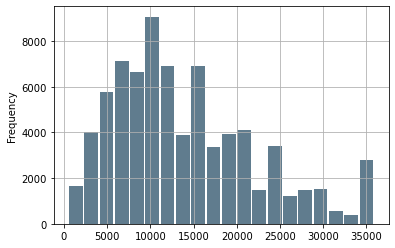

In [16]:
# Filling by a single value
temp = np.array(df["Current Loan Amount"].values.tolist())

# Converted all of the outliers into NAN
df["Current Loan Amount_temp"] = np.where(temp > 9999998, 'NaN', temp).tolist()


temp = df["Current Loan Amount_temp"][df["Current Loan Amount_temp"]!='NaN'].astype(str).astype(int)
temp.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e');

In [17]:
temp.describe()

count    76172.000000
mean     13933.915756
std       8235.921922
min        491.000000
25%       7810.000000
50%      12038.000000
75%      19351.000000
max      35875.000000
Name: Current Loan Amount_temp, dtype: float64

In [18]:
# Replacing the data with 50% percentile(12038) instead of NAN
temp = np.array(df["Current Loan Amount"].values.tolist())
df["Current Loan Amount"] = np.where(temp > 9999998, 12038, temp).tolist()

# Dropping the NAN Column
df = df.drop(['Current Loan Amount_temp'],axis=1)

In [19]:
df.shape

(88910, 19)

### Term Column

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


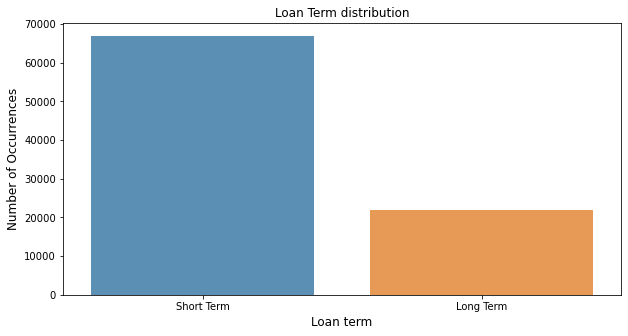

In [20]:
status = df["Term"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Term distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan term', fontsize=12)
plt.show()

The data doesn't have any issues like missing values or outliers so we do not need to work on it

### Credit Score

In [21]:
df["Credit Score"].describe()

count    67572.000000
mean      1199.199580
std       1680.813805
min        585.000000
25%        714.000000
50%        733.000000
75%        744.000000
max       7510.000000
Name: Credit Score, dtype: float64

Max is 7510. The credit scores ranges from 0-800, so the max value shown is not possible

In [22]:
df["Credit Score"].isnull().unique()

array([False,  True])

In [23]:
# Let us firstly divide the values greater than 800 by 10
df["Credit Score"] = np.where(df["Credit Score"]>800, 
                              df["Credit Score"]/10, 
                              df["Credit Score"])

In [24]:
# Now lets replace the missing values with median 
median_score = statistics.median(df["Credit Score"])

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


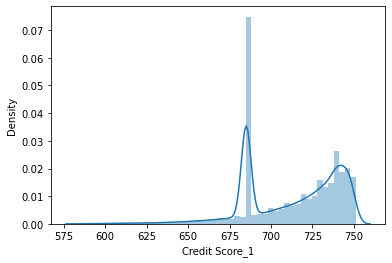

In [25]:
df["Credit Score_1"] = df["Credit Score"]
df["Credit Score_1"].fillna(median_score, inplace = True) 

sns.distplot(df["Credit Score_1"]);

As we can see this data is skewed so when we replace it with median it is giving us problems.

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


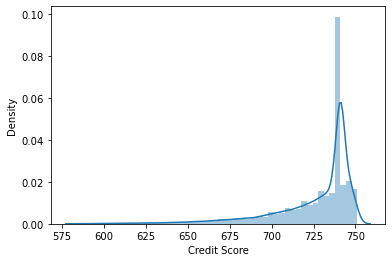

In [26]:
# Replacing with 75th percentile and taking log we get a better distribution
df["Credit Score"].fillna(741, inplace = True) 

sns.distplot(df["Credit Score"]);

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


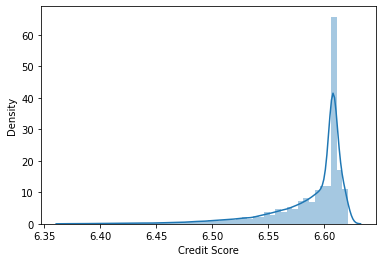

In [27]:
sns.distplot(np.log(df["Credit Score"]));

### Home Ownership

In [28]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

We have 4 unique values which makes no sense, cause we should only have 3 unique values 'Rent', 'HomeMortgage', 'Own Home'. As a result 'HaveMortgage' doesn't have any businees here, so we going to merge it with the 'HomeMortgage'

In [29]:
df['Home Ownership'] = df['Home Ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)

In [30]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

### Annual Income

In [31]:
df['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

Max value seems pretty high

In [32]:
df['Annual Income'].quantile([.2,0.75,0.90,.95,0.99,.999])

0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

As we can see the highest values was present in the 99th quantile of the data, which is an outlier. Lets replace them with the 95th percentile value which is 147645

In [33]:
df.loc[df['Annual Income'] > 147645, 'Annual Income'] = 147645

In [34]:
df['Annual Income'].describe()

count     67572.000000
mean      69063.213580
std       32802.303778
min        4033.000000
25%       44586.000000
50%       61494.000000
75%       86750.250000
max      147645.000000
Name: Annual Income, dtype: float64

In [35]:
df['Annual Income'].isna().sum()

21338

### Loan Purpose

In [36]:
df['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

So other and Other mean the same thing. Lets make it the same

In [37]:
df['Purpose']=df['Purpose'].str.replace('Other', 'other', regex=True)

In [38]:
df['Purpose'].value_counts()

Debt Consolidation      70447
other                    7767
Home Improvements        5206
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

### Monthly Debt

In [39]:
df['Monthly Debt'].describe()

count     88910
unique    70066
top           0
freq         69
Name: Monthly Debt, dtype: object

So this is not numeric column. Lets explore

In [40]:
df['Monthly Debt']

0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
88905     567.62
88906    2508.63
88907      818.2
88908     360.17
88909     749.13
Name: Monthly Debt, Length: 88910, dtype: object

In [41]:
# Converting to float
# pd.to_numeric(df['Monthly Debt'])

# Unable to parse string "$1051.41" at position 10

As we can see there is a $ symbol present. Lets replace it

In [42]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '', regex=True)

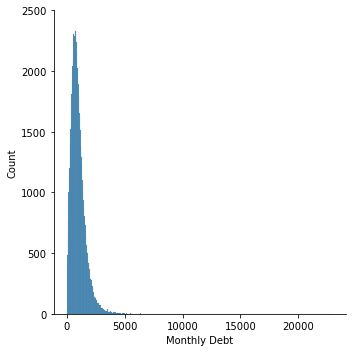

In [43]:
df['Monthly Debt'] = pd.to_numeric(df['Monthly Debt'])

sns.displot(df['Monthly Debt']);

The graph is steep and d graph has stretched out to 20000

In [44]:
df['Monthly Debt'].describe()

count    88910.000000
mean       963.102059
std        637.524064
min          0.000000
25%        532.220000
50%        843.925000
75%       1250.527500
max      22939.120000
Name: Monthly Debt, dtype: float64

The max value is high, which is about 20 times of the 75%

In [45]:
df['Monthly Debt'].quantile([0.2,0.75,0.90,0.95,0.99,0.999])

0.200     463.75000
0.750    1250.52750
0.900    1743.08300
0.950    2115.51100
0.990    3087.11100
0.999    4926.37475
Name: Monthly Debt, dtype: float64

At the 99th percentile, there seems to be no outliers so we need to investigate further

In [46]:
df['Monthly Debt'].quantile([0.9995, 0.9999])

0.9995    5482.111455
0.9999    7774.610660
Name: Monthly Debt, dtype: float64

In [47]:
df['Monthly Debt'].quantile([0.9997, 0.99999])

0.99970     5978.574911
0.99999    13262.762330
Name: Monthly Debt, dtype: float64

In [48]:
df['Monthly Debt'].quantile([0.999, 1])

0.999     4926.37475
1.000    22939.12000
Name: Monthly Debt, dtype: float64

In [49]:
df.loc[df['Monthly Debt'] > 4926, 'Monthly Debt'] = 4926

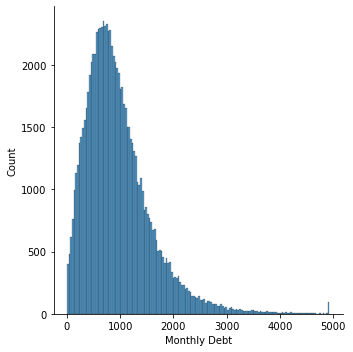

In [50]:
sns.displot(df['Monthly Debt']);

### Years of Credit History

In [51]:
df['Years of Credit History'].value_counts()

16.0    1234
15.0    1159
17.0    1091
16.5    1045
14.0    1031
        ... 
59.7       1
52.8       1
59.9       1
59.5       1
50.2       1
Name: Years of Credit History, Length: 508, dtype: int64

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


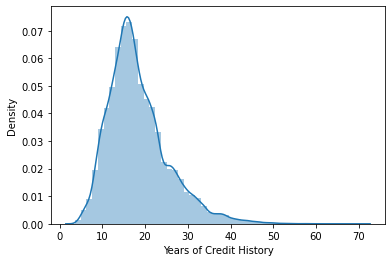

In [52]:
sns.distplot(df["Years of Credit History"]);

### Months since last delinquent

In [53]:
df['Months since last delinquent'].describe()

count    40404.000000
mean        35.080289
std         22.008583
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [54]:
#Lets check if there are any NA's
df['Months since last delinquent'].isna().sum()

48506

### Number of Open Accounts

In [55]:
df['Number of Open Accounts'].describe()

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

The max value is too high for someone to open that much accounts

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


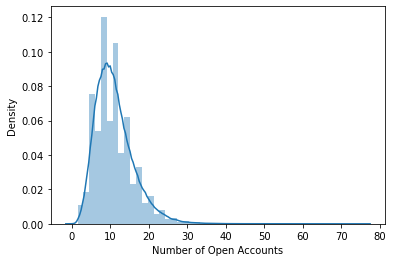

In [56]:
sns.distplot(df['Number of Open Accounts']);

In [57]:
df['Number of Open Accounts'].quantile([0.75,0.999,1])

0.750    14.0
0.999    36.0
1.000    76.0
Name: Number of Open Accounts, dtype: float64

Ok so replacing anything greater than 99th percentile with 99th percentile values

In [58]:
df.loc[df['Number of Open Accounts'] > 36, 'Number of Open Accounts'] = 36

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


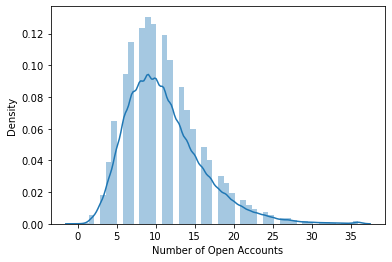

In [59]:
sns.distplot(df['Number of Open Accounts']);

### Number of Credit Problems

In [60]:
df['Number of Credit Problems'].describe()

count    88910.000000
mean         0.160477
std          0.473746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Number of Credit Problems, dtype: float64

Max looks a bit higher. Lets see

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


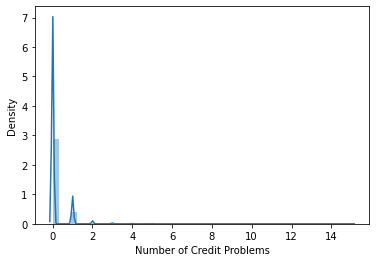

In [61]:
sns.distplot(df['Number of Credit Problems']);

In [62]:
df['Number of Credit Problems'].value_counts()

0     77057
1     10271
2      1092
3       311
4       101
5        46
6        14
7         6
9         4
10        3
8         2
11        1
12        1
15        1
Name: Number of Credit Problems, dtype: int64

### Current Credit Balance

In [63]:
df['Current Credit Balance'].describe()

count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


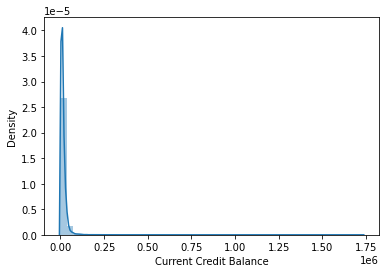

In [64]:
sns.distplot(df['Current Credit Balance']);

It seems there are outliers in this data. Lets investigate

In [65]:
df['Current Credit Balance'].quantile([0.75,0.95,0.999,1])

0.750      19301.000
0.950      39933.300
0.999     227670.033
1.000    1730472.000
Name: Current Credit Balance, dtype: float64

In [66]:
df['Current Credit Balance'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95      39933.30
0.96      43501.20
0.97      48507.73
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

In [67]:
#So lets replace it with 95th percentile
df['Current Credit Balance'].quantile([0.55,0.76,0.87,0.98,0.99,1])

0.55      12295.00
0.76      19805.84
0.87      27525.66
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

In [68]:
df.loc[df['Current Credit Balance'] > 57938, 'Current Credit Balance'] = 57948

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


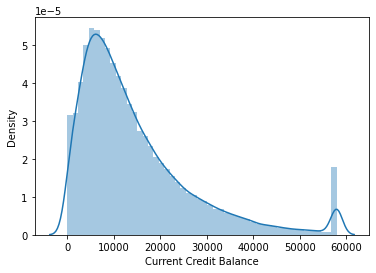

In [69]:
sns.distplot(df['Current Credit Balance']);

The plot doesnt look good. We need to transform it

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


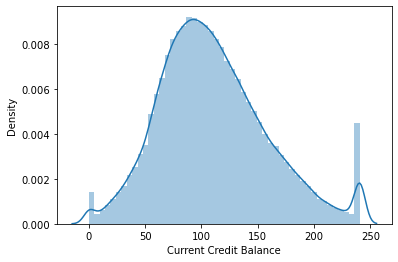

In [70]:
sns.distplot(df['Current Credit Balance']**(1/2));

In [71]:
df['Current Credit Balance'] = df['Current Credit Balance']**(1/2)

### Maximum Open Credit

In [72]:
df['Maximum Open Credit'].describe()

count     88910
unique    46625
top           0
freq        610
Name: Maximum Open Credit, dtype: object

In [73]:
df['Maximum Open Credit'].value_counts()

0        610
10782     10
14382     10
11044     10
17464     10
        ... 
22795      1
2304       1
9886       1
54341      1
33862      1
Name: Maximum Open Credit, Length: 46625, dtype: int64

In [74]:
# sns.distplot(df['Maximum Open Credit'])

#  could not convert string to float: '#VALUE!'

In [75]:
# So there are some str characters present in the data. Lets find them
# pd.to_numeric(df['Maximum Open Credit'])


# Unable to parse string "#VALUE!" at position 4930

In [76]:
# Lets replace #value with NAN
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', np.nan, regex=True)
    
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'])

In [77]:
df['Maximum Open Credit'].isnull().sum()

2

In [78]:
#Now we have only 2 NAN in the data. Lets replace them with mean 35965  
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(35965)

In [79]:
df['Maximum Open Credit'].quantile([0.55,0.76,0.87,0.98,0.99,1])

0.55       24037.95
0.76       37259.84
0.87       50736.66
0.98      114682.56
0.99      171423.91
1.00    69988086.00
Name: Maximum Open Credit, dtype: float64

In [80]:
#Lets replace the outliers
df.loc[df['Maximum Open Credit'] > 171423, 'Maximum Open Credit'] = 171423

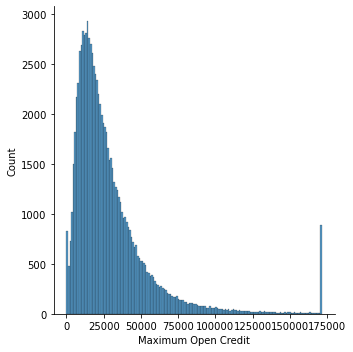

In [81]:
sns.displot(df['Maximum Open Credit']);

### Bankruptcies

In [82]:
df['Bankruptcies'].describe()

count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [83]:
df['Bankruptcies'].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [84]:
df['Bankruptcies'].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [85]:
#So we have Nan's. Lets fill them with median
df['Bankruptcies'] = df['Bankruptcies'].fillna(3)

### Tax Liens

In [86]:
df['Tax Liens'].describe()

count    88902.000000
mean         0.028222
std          0.257533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [87]:
df['Tax Liens'].value_counts()

0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
11.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [88]:
df['Bankruptcies'].unique()

array([0., 1., 3., 2., 4., 5., 7., 6.])

In [89]:
df.T

0      \
Loan ID                       6cf51492-02a2-423e-b93d-676f05b9ad53   
Customer ID                   7c202b37-2add-44e8-9aea-d5b119aea935   
Loan Status                                           Loan Refused   
Current Loan Amount                                          12232   
Term                                                    Short Term   
Credit Score                                                 728.0   
Years in current job                                      < 1 year   
Home Ownership                                                Rent   
Annual Income                                              46643.0   
Purpose                                         Debt Consolidation   
Monthly Debt                                                777.39   
Years of Credit History                                       18.0   
Months since last delinquent                                  10.0   
Number of Open Accounts                                         12   
Number of Credit Problems                                        0   
Current Credit Balance                                   82.231381   
Maximum Open Credit                                         7946.0   
Bankruptcies                                                   0.0   
Tax Liens                                                      0.0   
Credit Score_1                                               728.0   

                                                             1      \
Loan ID                       552e7ade-4292-4354-9ff9-c48031697d72   
Customer ID                   e7217b0a-07ac-47dd-b379-577b5a35b7c6   
Loan Status                                           Loan Refused   
Current Loan Amount                                          25014   
Term                                                     Long Term   
Credit Score                                                 733.0   
Years in current job                                     10+ years   
Home Ownership                                       Home Mortgage   
Annual Income                                              81099.0   
Purpose                                         Debt Consolidation   
Monthly Debt                                                892.09   
Years of Credit History                                       26.7   
Months since last delinquent                                   NaN   
Number of Open Accounts                                         14   
Number of Credit Problems                                        0   
Current Credit Balance                                  188.960313   
Maximum Open Credit                                        77961.0   
Bankruptcies                                                   0.0   
Tax Liens                                                      0.0   
Credit Score_1                                               733.0   

                                                             2      \
Loan ID                       9b5e32b3-8d76-4801-afc8-d729d5a2e6b9   
Customer ID                   0a62fc41-16c8-40b5-92ff-9e4b763ce714   
Loan Status                                           Loan Refused   
Current Loan Amount                                          16117   
Term                                                    Short Term   
Credit Score                                                 724.0   
Years in current job                                       9 years   
Home Ownership                                       Home Mortgage   
Annual Income                                              60438.0   
Purpose                                          Home Improvements   
Monthly Debt                                               1244.02   
Years of Credit History                                       16.7   
Months since last delinquent                                  32.0   
Number of Open Accounts                                         11   
Number of Credit Problems                                        1   

### Missing Values

In [90]:
from fancyimpute import SoftImpute

#Converting all the categorical columns into numbers

cat_cols = ['Term','Years in current job','Home Ownership','Purpose']

for c in cat_cols:
    df[c] = pd.factorize(df[c])[0]
    
# Imputing missing data with soft impute
updated_df = pd.DataFrame(data = SoftImpute().fit_transform(df[df.columns[3:19]]), 
                          columns = df[df.columns[3:19]].columns, index=df.index)

[SoftImpute] Max Singular Value of X_init = 22033008.921397
[SoftImpute] Iter 1: observed MAE=252.662721 rank=3
[SoftImpute] Iter 2: observed MAE=252.638938 rank=3
[SoftImpute] Iter 3: observed MAE=252.664481 rank=3
[SoftImpute] Iter 4: observed MAE=252.702156 rank=3
[SoftImpute] Iter 5: observed MAE=252.742178 rank=3
[SoftImpute] Iter 6: observed MAE=252.781822 rank=3
[SoftImpute] Iter 7: observed MAE=252.820282 rank=3
[SoftImpute] Iter 8: observed MAE=252.857189 rank=3
[SoftImpute] Iter 9: observed MAE=252.892613 rank=3
[SoftImpute] Iter 10: observed MAE=252.926282 rank=3
[SoftImpute] Iter 11: observed MAE=252.958314 rank=3
[SoftImpute] Iter 12: observed MAE=252.988789 rank=3
[SoftImpute] Iter 13: observed MAE=253.017703 rank=3
[SoftImpute] Iter 14: observed MAE=253.045116 rank=3
[SoftImpute] Iter 15: observed MAE=253.071123 rank=3
[SoftImpute] Iter 16: observed MAE=253.095754 rank=3
[SoftImpute] Iter 17: observed MAE=253.118984 rank=3
[SoftImpute] Iter 18: observed MAE=253.140987 ra

In [91]:
# Getting the dataset ready pd.get_dummies function for dropping the dummy variables
df_LC = pd.get_dummies(updated_df, drop_first=True)

In [92]:
df_LC.head()

Current Loan Amount  Term  Credit Score  Years in current job  \
0              12232.0   0.0         728.0                   0.0   
1              25014.0   1.0         733.0                   1.0   
2              16117.0   0.0         724.0                   2.0   
3              11716.0   0.0         740.0                   3.0   
4               9789.0   1.0         686.0                   1.0   

   Home Ownership  Annual Income  Purpose  Monthly Debt  \
0             0.0        46643.0      0.0        777.39   
1             1.0        81099.0      0.0        892.09   
2             1.0        60438.0      1.0       1244.02   
3             0.0        34171.0      0.0        990.94   
4             1.0        47003.0      1.0        503.71   

   Years of Credit History  Months since last delinquent  \
0                     18.0                     10.000000   
1                     26.7                     45.061281   
2                     16.7                     32.000000   
3                     10.0                     20.976913   
4                     16.7                     25.000000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                     12.0                        0.0               82.231381   
1                     14.0                        0.0              188.960313   
2                     11.0                        1.0              106.183803   
3                     21.0                        0.0               83.719771   
4                     13.0                        1.0              130.049990   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0               7946.0           0.0        0.0  
1              77961.0           0.0        0.0  
2              14815.0           1.0        0.0  
3              43533.0           0.0        0.0  
4              19553.0           1.0        0.0

In [93]:
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder

# LabelBinarizer is a function used for ....... the binary variables
# Binarizing the Target variable
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(df['Loan Status'])
y = lb_results
y = y.ravel()

In [94]:
from sklearn import preprocessing
#Scaling the independent variables
X_scaled = preprocessing.scale(df_LC)
print(X_scaled)
print('   ')
print(X_scaled.shape)

[[-0.1869176  -0.57302977  0.06886311 ... -0.79845518 -0.32295035
  -0.10958444]
 [ 1.48349848  1.74511004  0.26644983 ...  1.83825771 -0.32295035
  -0.10958444]
 [ 0.32079375 -0.57302977 -0.08920626 ... -0.53977375  2.39304617
  -0.10958444]
 ...
 [ 1.40247376 -0.57302977  0.78017528 ...  0.91232955 -0.32295035
  -0.10958444]
 [-1.1281112  -0.57302977 -0.16824094 ... -0.4039368  -0.32295035
  -0.10958444]
 [ 0.62515919 -0.57302977 -0.32631031 ... -0.30218149 -0.32295035
   3.77361184]]
   
(88910, 16)


## Modelling

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [96]:
# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [97]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),
          "Decision Tree": DecisionTreeClassifier()
         }

# Creating a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [98]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\oabas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:26:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.7216661043002287,
 'KNN': 0.6873242604881341,
 'Random Forest': 0.7284894837476099,
 'XGBoost': 0.7288643947062573,
 'Decision Tree': 0.6557192666741649}

Dropping KNN and Decision Tree

In [99]:
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']
    
    # Creating a dataframe with the cols created and create a confusion matrix in the form of dictionary
    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)}
                       )

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        # False +ve rate(fpr), True +ve rate(tpr)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

computing GradientBoosting - Non-balanced 
computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 
[14:27:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\oabas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


computing XGBClassifier - Non-balanced 


model  matthews_corrcoef  roc_auc_score  precision_score  \
0        GradientBoosting           0.245243       0.752373         0.581995   
1      LogisticRegression           0.160263       0.676416         0.567487   
2  RandomForestClassifier           0.186988       0.693934         0.505628   
3           XGBClassifier           0.245891       0.741790         0.552426   

   recall_score  f1_score    model_type  
0      0.251013  0.350749  Non-balanced  
1      0.123676  0.203091  Non-balanced  
2      0.229050  0.315278  Non-balanced  
3      0.287227  0.377946  Non-balanced

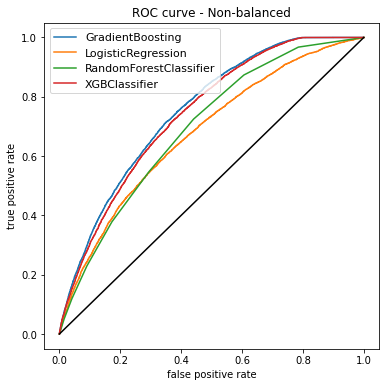

In [100]:
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')


models_report

From the model report, we could see that Gradient Boosting and XGBClassifier performs much better than the other models. But Gradient Boosting comes out on top for the ROC Curve

In [101]:
conf_matrix

{'GradientBoosting': Predicted      0     1
 True                  
 0          17645  1379
 1           5729  1920,
 'LogisticRegression': Predicted      0    1
 True                 
 0          18303  721
 1           6703  946,
 'RandomForestClassifier': Predicted      0     1
 True                  
 0          17311  1713
 1           5897  1752,
 'XGBClassifier': Predicted      0     1
 True                  
 0          17244  1780
 1           5452  2197}

### Balancing the dataset

In [102]:
from imblearn.over_sampling import SMOTE

index_split = int(len(X_scaled)/2)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_scaled[0:index_split, :], y[0:index_split])
X_test, y_test = X_scaled[index_split:], y[index_split:]

computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 


C:\Users\oabas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
computing XGBClassifier - Balanced 


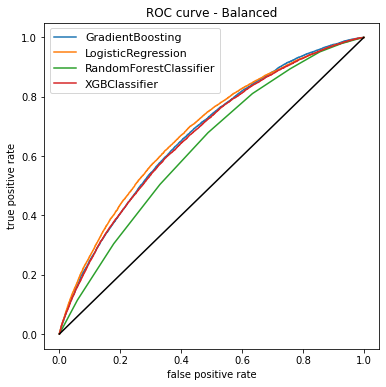

In [103]:
models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

In [104]:
models_report_bal

model  matthews_corrcoef  roc_auc_score  precision_score  \
0        GradientBoosting           0.188230       0.673463         0.327231   
1      LogisticRegression           0.246989       0.683747         0.431558   
2  RandomForestClassifier           0.170965       0.628744         0.334725   
3           XGBClassifier           0.196875       0.668896         0.340620   

   recall_score  f1_score model_type  
0      0.905456  0.480727   Balanced  
1      0.545918  0.482048   Balanced  
2      0.810753  0.473828   Balanced  
3      0.842692  0.485143   Balanced

We can't work with the Balanced dataset cause the ROC Score is prettey low compared to the Unbalanced Dataset

In [105]:
# Now we  know that GBM model performed the best from the Unbalanced Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
gbm = GradientBoostingClassifier(max_depth = 6, n_estimators = 100, max_features = 0.3)
gbm.fit(X_scaled, y)

GradientBoostingClassifier(max_depth=6, max_features=0.3)

In [106]:
import joblib
joblib.dump(gbm, 'GBM_Model_version1.pkl')

['GBM_Model_version1.pkl']

## Predicting the model on a test dataset

In [107]:
test = pd.read_csv("test_data.csv", low_memory=False)


In [108]:
test.shape

(9, 19)

We have to perform the same EDA we did on the train dataset to the test dataset

In [109]:
cat_cols = ['Term','Years in current job','Home Ownership','Purpose']

for c in cat_cols:
    test[c] = pd.factorize(test[c])[0]

# Imputing missing data with soft impute
updated_test_data = pd.DataFrame(data=SoftImpute().fit_transform(test[test.columns[3:19]],), 
                               columns=test[test.columns[3:19]].columns, index=test.index)

[SoftImpute] Max Singular Value of X_init = 220732.319189
[SoftImpute] Iter 1: observed MAE=393.868714 rank=4
[SoftImpute] Iter 2: observed MAE=393.835770 rank=4
[SoftImpute] Iter 3: observed MAE=393.823069 rank=4
[SoftImpute] Iter 4: observed MAE=393.816892 rank=4
[SoftImpute] Iter 5: observed MAE=393.813120 rank=4
[SoftImpute] Iter 6: observed MAE=393.810394 rank=4
[SoftImpute] Iter 7: observed MAE=393.808205 rank=4
[SoftImpute] Iter 8: observed MAE=393.806333 rank=4
[SoftImpute] Iter 9: observed MAE=393.804668 rank=4
[SoftImpute] Iter 10: observed MAE=393.803152 rank=4
[SoftImpute] Iter 11: observed MAE=393.801748 rank=4
[SoftImpute] Iter 12: observed MAE=393.800437 rank=4
[SoftImpute] Iter 13: observed MAE=393.799203 rank=4
[SoftImpute] Iter 14: observed MAE=393.798037 rank=4
[SoftImpute] Iter 15: observed MAE=393.796931 rank=4
[SoftImpute] Iter 16: observed MAE=393.795881 rank=4
[SoftImpute] Iter 17: observed MAE=393.794882 rank=4
[SoftImpute] Iter 18: observed MAE=393.793931 rank

In [110]:
# Getting the dataset ready pd.get dummies function for dropping the dummy variables
test_data = pd.get_dummies(updated_test_data, drop_first=True)

In [111]:
gbm_pickle = joblib.load('GBM_Model_version1.pkl')

In [112]:
y_pred = gbm_pickle.predict(test_data)
y_pred

C:\Users\oabas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
y_pred = gbm_pickle.predict_proba(test_data)
y_pred

C:\Users\oabas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([[0.68070196, 0.31929804],
       [0.52659422, 0.47340578],
       [0.6279872 , 0.3720128 ],
       [0.66902353, 0.33097647],
       [0.50707664, 0.49292336],
       [0.55545973, 0.44454027],
       [0.66902353, 0.33097647],
       [0.53506515, 0.46493485],
       [0.66902353, 0.33097647]])

In [114]:
y_pred_1 = np.where(y_pred == 1, 'Loan Rejected', 'Loan Approved')

test['Loan Status'] = y_pred_1
test.to_csv('Output_Test.csv',index=False)